<a href="https://colab.research.google.com/github/shnkrg/vt/blob/master/sahinkerasyedek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix
import pandas as pd


print('Kütüphaneler Aktarıldı')

Kütüphaneler Aktarıldı


In [2]:
! git clone https://github.com/shnkrg/vt.git

Cloning into 'vt'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 20.50 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (2295/2295), done.


In [3]:
import os
main_dir = "/content/vt/Data"
train_dir = os.path.join(main_dir, 'train')

test_dir = os.path.join(main_dir, 'test')

train_covid_dir = os.path.join(train_dir, 'COVID19')

train_normal_dir = os.path.join(train_dir, 'NORMAL')

test_covid_dir  = os.path.join(test_dir, 'COVID19')

test_normal_dir =  os.path.join(test_dir, 'NORMAL')

In [4]:
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)
test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

In [5]:
print("Eğitim setinde bulunan toplam dosya:" , len(train_covid_names+train_normal_names))
print("Test setinde bulunan toplam dosya:" , len(test_covid_names+test_normal_names))

Eğitim setinde bulunan toplam dosya: 1811
Test setinde bulunan toplam dosya: 484


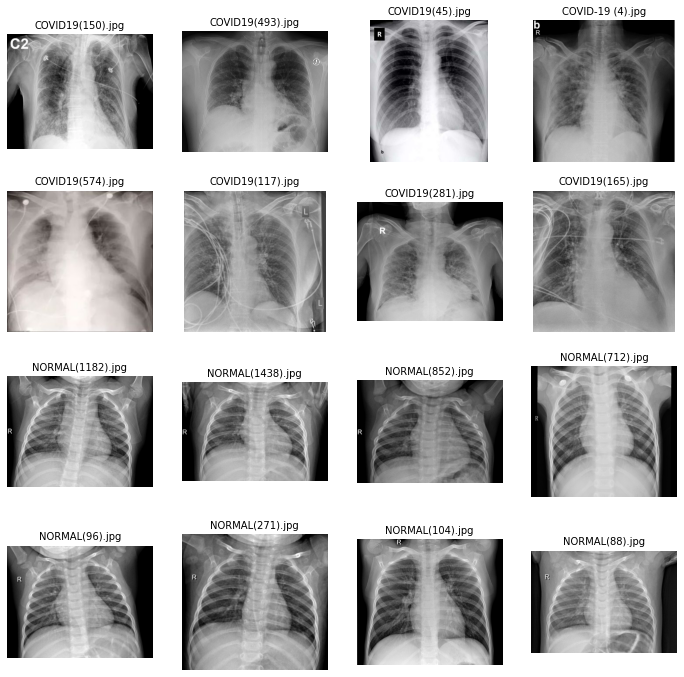

In [6]:
#veri görüntüleme
import matplotlib.image as mpimg
rows = 4
cols = 4
fig = plt.gcf()
fig.set_size_inches(12,12)
covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

merged_list = covid_pic+normal_pic
for i, img_path in enumerate(merged_list):
    data = img_path.split('/',6)[6]
    sp = plt.subplot(rows,cols,i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    sp.set_title(data,fontsize=10)
    plt.imshow(img,cmap='gray')
    
plt.show()
    

In [7]:
#Veri Ön İşleme 
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator (rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
                                                 
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
                                                 
test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
train_generator.image_shape

(150, 150, 3)

In [10]:
#Sinir Ağı Oluşturma Modeli

model = Sequential()
model.add(Conv2D(32,(5,5), padding = 'SAME', activation='relu' , input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64 ,(5,5),padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [11]:
#modeli eğitiyoruz

test = model.compile(Adam(lr=0.001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [12]:
#derin öğrenme

history = model.fit(train_generator, epochs = 5, validation_data = validation_generator)

Epoch 1/5
46/46 [==============================] - 149s 3s/step - loss: 2.1337 - accuracy: 0.6774 - val_loss: 0.4414 - val_accuracy: 0.8702
Epoch 2/5
46/46 [==============================] - 147s 3s/step - loss: 0.2660 - accuracy: 0.8943 - val_loss: 0.4458 - val_accuracy: 0.9337
Epoch 3/5
46/46 [==============================] - 149s 3s/step - loss: 0.2082 - accuracy: 0.9197 - val_loss: 0.2437 - val_accuracy: 0.9558
Epoch 4/5
46/46 [==============================] - 146s 3s/step - loss: 0.1855 - accuracy: 0.9305 - val_loss: 0.3655 - val_accuracy: 0.9309
Epoch 5/5
46/46 [==============================] - 146s 3s/step - loss: 0.2000 - accuracy: 0.9319 - val_loss: 0.1580 - val_accuracy: 0.9530


In [13]:
#Performans Değerlendirmesi
#Nesnelerin anahtarını getir

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

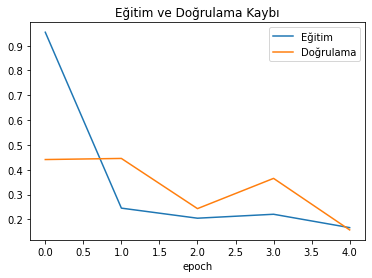

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

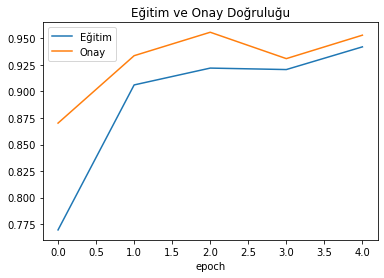

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Eğitim','Onay'])
plt.title('Eğitim ve Onay Doğruluğu')
plt.xlabel('epoch')

In [16]:
#Testin doğruluk ve kaybını öğrenin.
test_loss, test_acc = model.evaluate(test_generator)
print('test loss:{} test acc : {}'.format(test_loss, test_acc))

16/16 [==============================] - 19s 1s/step - loss: 0.1397 - accuracy: 0.9566
test loss:0.1396695226430893 test acc : 0.9566115736961365


In [17]:
error_rate= 1- test_acc
print("Hata Oranı: ",error_rate)

Hata Oranı:  0.043388426303863525


In [18]:
#Dosya Seçin ve Test Edin
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = "/content/"+filename
  img = image.load_img(img_path, target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(filename)

  if prediction == 0:
    print('Covid Pozitif')
  else:
    print('Covid Negatif')

Saving normal1.jpg to normal1.jpg
normal1.jpg
Covid Negatif


Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


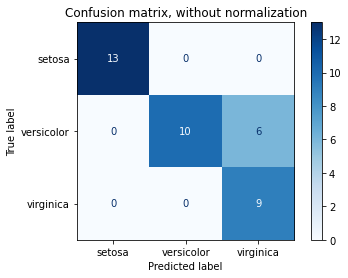

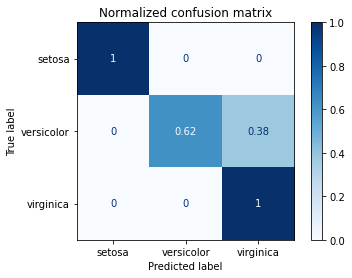

In [19]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()